# PyTorch Computer vision

Github: https://github.com/mrdbourke/pytorch-deep-learning/tree/main

Pytorch book: https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer Vision libraries in PyTorch

* `torchvision` : Base library for the PyTorch computer vision
* `torchvision.datasets`: get datasets and data loading for the computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transformers` - functions for manipulating your vision data to be suitable for use with an ML model
* `torch.utils.data.Dataset` Base dataset class for PyTorch
* `torch.utils.data.DataLoader`: Create a Python iterable over a dataset

In [ ]:
import torch
from torch import nn

#Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


## 1. Get the dataset

Fashion MNIST: https://github.com/zalandoresearch/fashion-mnist

We can also import from `torchvision.datasets`: https://pytorch.org/vision/stable/datasets.html

In [ ]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", # Where to download the data
    train=True, # do we want the training dataset
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/target
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11807240.02it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202304.01it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3725132.60it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6405303.17it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
#check the shape of our image
print(f"Image Shape: {image.shape} -> [colour_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [colour_channels, height, width]
Image label: Ankle boot


## 1.2 Visualizing out data

* input shape of the pytorchvision is (colour_channel,height,width) but many ML library accept the shape (height,width,colour_channel)

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

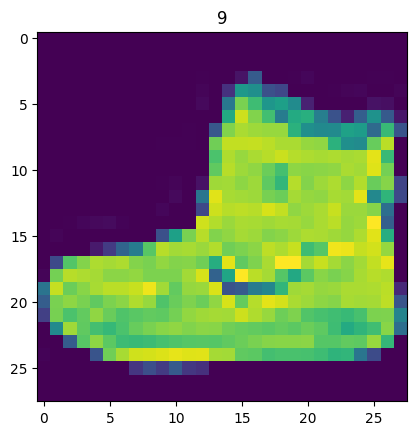

In [ ]:
import matplotlib.pyplot as plt

image,label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)


In [ ]:
image.shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

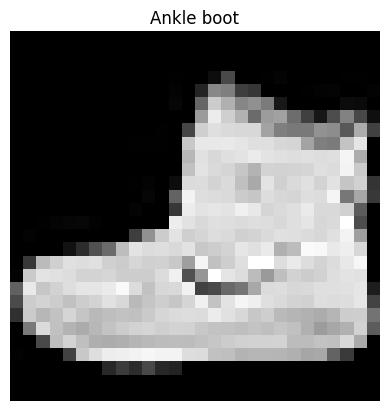

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

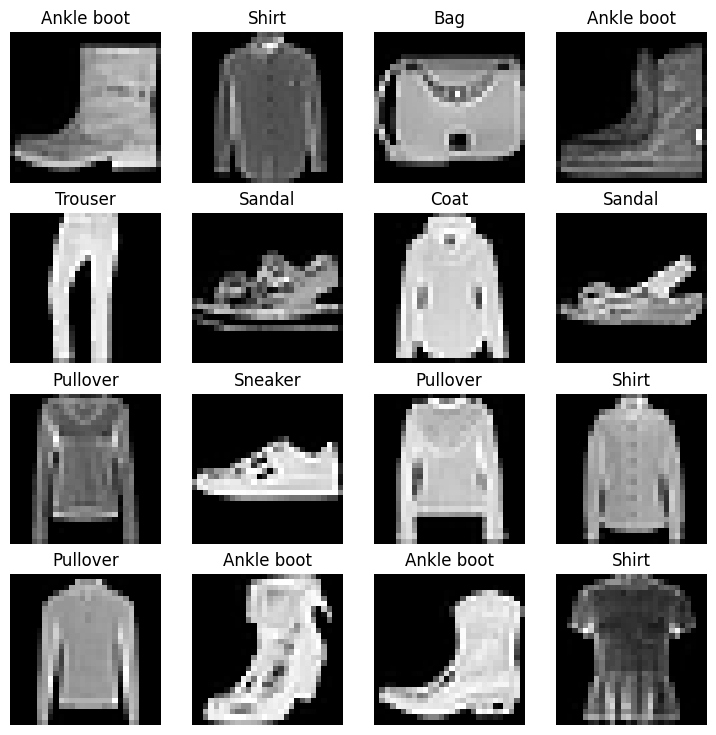

In [ ]:
# PLot more images
torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
row,col = 4,4
for i in range(1,row*col+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(row,col,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)


Do you think these items of clothing could be modelled with pure linear lines? Or do you think we'll need non-linear lines

## 2. Prepare Dataloader

Right now, out data is in the form of PyTorch datasets

DataLoader turns our dataset into a Python iterable

More specifically, we want to turn out data into batches (or mini-batches)

Why would we do this?

1. It is more computationally efficient, as in your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32)
2. It gives our neural network more chances to update its gradients per epoch.

For more on minibatches see the paper: https://cs230.stanford.edu/files/C2M2.pdf

Youtube video: https://www.youtube.com/watch?v=4qJaSmvhxi8

In [ ]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
from torch.utils.data import DataLoader

#setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn the datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79019b7ef1f0>,
 <torch.utils.data.dataloader.DataLoader at 0x79019b77cee0>)

In [ ]:
print(f"Train DataLoader: {train_dataloader}")
print(f"Test DataLoader: {test_dataloader}")
print(f"Length of Train Dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of Test Dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}..." )

Train DataLoader: <torch.utils.data.dataloader.DataLoader object at 0x79019b7ef1f0>
Test DataLoader: <torch.utils.data.dataloader.DataLoader object at 0x79019b77cee0>
Length of Train Dataloader: 1875 batches of 32...
Length of Test Dataloader: 313 batches of 32...


In [ ]:
# Check out what's inside the train_dataloader
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


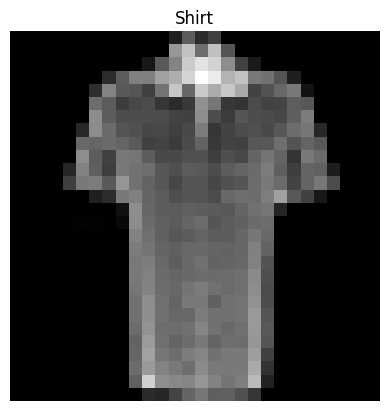

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]

plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Building a baseline model

When starting to build a series of machine learning model, its best practice is to build a baseline model.

Baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In Other words: start simple and add complexity when necessary

### 3.1 Creating a flatten layer

We are creating the flatten layer because we are creating the baseline model in which we will use linear layer which can not handle the multidimention data that is why we are reducing the dimensions using flattening

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform a forward pass

# print out what happened
print(f"Shape before flattening: {x.shape} -> [colour_channels,height,width]")
print(f"Shape after flattening: {output.shape} -> colour_channels,height*width")

Shape before flattening: torch.Size([1, 28, 28]) -> [colour_channels,height,width]
Shape after flattening: torch.Size([1, 784]) -> colour_channels,height*width


### 3.2 Creating the model

In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=(len(class_names))
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.3 Setup loss, optimizer and evaluation metrics

* Loss function - since we are working with multi class data, out loss function will be `nn.CrossEntropyLoss()`
* Optimizer - Our Optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metrics

In [ ]:
# define accuracy function
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

### 3.4 Create a function to time our experiments

ML is very experimental

Two of the main things you'll often want to track are
1. Model's performance (loss and accuracy values)
2. How fast our code is running

In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Print difference between start and end time"""
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()

end_time = timer()

print_train_time(start=start_time,end=end_time,device="cpu")

Train time on cpu: 0.000 seconds


5.2972000048612244e-05

### 3.5 Build the training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps. calculate the train loss **per batch**.
3. Loop through testing batches,perform testing steps, calculate the test loss **per batch**.
4. Print out what's happening
5. Time it all (for fun).

tqdm documentation: https://pypi.org/project/tqdm/


In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# setup the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n------")
  # Training
  train_loss = 0
  acc = 0
  # Add a loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward pass
    y_pred = model_0(X)

    #2. Calculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss+=loss  ## accumulate the training loss

    # Accuracy
    acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if batch%400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)
  acc /= len(train_dataloader)

  ### Testing
  test_loss,test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #1. Forward pass
      test_pred = model_0(X_test)

      #2. Calculate loss
      test_loss += loss_fn(test_pred,y_test)

      #3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss {train_loss:.4f}, Accuracy: {acc:.2f}, // Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}: ")

#Calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss 0.5904, Accuracy: 79.17, // Test loss: 0.5095, Test acc: 82.04: 
Epoch: 1 
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss 0.4763, Accuracy: 83.32, // Test loss: 0.4799, Test acc: 83.20: 
Epoch: 2 
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss 0.4550, Accuracy: 84.05, // Test loss: 0.4766, Test acc: 83.43: 
Train time on cpu: 28.656 seconds


## 4. Make Prediction and get Model_0 Results. Creating eval_model function

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn):
  """Returen a dictionary containing the results of model predicting on data_loader"""
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make Prediction
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss and acc
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name":model.__class__.__name__,  # only works when model was created with the class
          "model_loss":loss.item(),
          "model_acc":acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [ ]:
!nvidia-smi

Tue May 14 00:40:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

### 6.1 Building model class

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape: int,
               hidden_unit: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features=hidden_unit,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x: torch.Tensor):
    return self.layer_stack(x)

torch.manual_seed(42)
model_1 = FashionMNISTModelV1(
    input_shape=28*28,
    hidden_unit=10,
    output_shape=len(class_names)
    ).to(device)

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 6.2 Setting up loss and optimizer

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_pred,y_true).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

### 6.3 Building the training loop

In [ ]:
'''from tqdm.auto import tqdm

torch.manual_seed(42)
start_time_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n------")

  train_loss = 0
  acc = 0

  for batch, (X,y) in enumerate(train_dataloader):
    model_1.train()

    # Predicting the value
    y_pred = model_1(X)

    # calculating the loss
    loss = loss_fn(y_pred,y)
    train_loss += loss
    acc += accuracy_fn(y_true=y,
                       y_pred=y_pred.argmax(dim=1))

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss Backward
    loss.backward()

    # Optmizer step
    optimizer.step()

    if batch%400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)
  acc /= len(train_dataloader)


  # Testing
  model_1.eval()
  test_loss,test_acc = 0,0
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # Prediction
      test_pred = model_1(X_test)

      # Calculate the loss
      test_loss += loss_fn(test_pred,y_test)

      # Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Train loss: {train_loss:.5f}, Train acc: {acc:.4f} // Test loss: {test_loss:5f}, Test acc: {test_acc:.4f}")


end_time_on_gpu = timer()

print_train_time(start= start_time_on_gpu,
                                 end=end_time_on_gpu,
                                 device= device)

'''






'from tqdm.auto import tqdm\n\ntorch.manual_seed(42)\nstart_time_on_gpu = timer()\n\nepochs = 3\n\nfor epoch in tqdm(range(epochs)):\n  print(f"Epoch: {epoch} \n------")\n\n  train_loss = 0\n  acc = 0\n\n  for batch, (X,y) in enumerate(train_dataloader):\n    model_1.train()\n\n    # Predicting the value\n    y_pred = model_1(X)\n\n    # calculating the loss\n    loss = loss_fn(y_pred,y)\n    train_loss += loss\n    acc += accuracy_fn(y_true=y,\n                       y_pred=y_pred.argmax(dim=1))\n\n    # Optimizer zero grad\n    optimizer.zero_grad()\n\n    # Loss Backward\n    loss.backward()\n\n    # Optmizer step\n    optimizer.step()\n\n    if batch%400 == 0:\n      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")\n\n  train_loss /= len(train_dataloader)\n  acc /= len(train_dataloader)\n\n\n  # Testing\n  model_1.eval()\n  test_loss,test_acc = 0,0\n  with torch.inference_mode():\n    for X_test,y_test in test_dataloader:\n      # Prediction\n      test_pr

### 6.4 Functionizing training and testing loop

Lets create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

#### 6.4.1 Creating Training function

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Preforms a training with model trying to learn on data_loader"""

  train_loss,train_acc = 0,0

  # Put the model into trainind mode
  model.train()

  for batch, (X,y) in enumerate(data_loader):
    X,y = X.to(device),y.to(device)

    # Predicting the value (outputs the raw logits from the model)
    y_pred = model(X)

    # calculating the loss
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                       y_pred=y_pred.argmax(dim=1))

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss Backward
    loss.backward()

    # Optmizer step
    optimizer.step()

  train_loss /= len(data_loader )
  train_acc /= len(data_loader)

  print(f"Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f}%")

#### 6.4.2 Creating the testing function

In [ ]:
def test_step(model:torch.nn.Module,
              test_dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over test_dataloader"""
  test_loss, test_acc = 0,0

  model.eval()

  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      X_test,y_test = X.to(device), y.to(device)

      test_pred = model(X_test)

      test_loss += loss_fn(test_pred,y_test)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Testing loss: {test_loss:.5f}, Testing acc: {test_acc:2f}%")
  print()

#### 6.4.3 Running the training and testing loop with function

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)

train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  print("-------")

  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            test_dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()

total_time_on_model_1 = print_train_time(start=train_time_start_on_gpu,
                 end=train_time_end_on_gpu,
                 device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train Loss: 1.09199, Train Acc: 61.34%
Testing loss: 1.26608, Testing acc: 53.125000%

Epoch: 1
-------
Train Loss: 0.78101, Train Acc: 71.93%
Testing loss: 0.99394, Testing acc: 62.500000%

Epoch: 2
-------
Train Loss: 0.67027, Train Acc: 75.94%
Testing loss: 0.88742, Testing acc: 71.875000%

Train time on cuda: 29.968 seconds


**Note:** Sometimes depending on your data/hardware you might find that your model tains faster on CPU than GPU,

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU.
2. The hardware you're using has a better CPU in terms of compute capability than the GPU.

For more on compute faster: https://horace.io/brrr_intro.html


#### 6.4.4 Modifying and running the eval_model_function

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn):
  """Returen a dictionary containing the results of model predicting on data_loader"""
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y = X.to(device),y.to(device)
      # Make Prediction
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss and acc
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name":model.__class__.__name__,  # only works when model was created with the class
          "model_loss":loss.item(),
          "model_acc":acc}



In [ ]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
print(model_0_results)
print(model_1_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663888335227966, 'model_acc': 83.42651757188499}
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.6850008964538574, 'model_acc': 75.01996805111821}


## 7. Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their capabilities to func patterns in visual data.

To find out what's happening inside the CNN: https://poloclub.github.io/cnn-explainer/


### 7.1 Building a CNN Class

In [ ]:
# Create a Convolutional Neural Network

class FashionMNISTModelV2(nn.Module):
  """Model Architechture of Convolutional Neural Network"""
  def __init__(self,input_shape: int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),  # Values we can set ourselves in out NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,   # Their is a trick for calculating this
                  out_features=output_shape)
    )

  def forward(self,x):
    #return self.classifier(self.conv_block_1(self.conv_block_1(x)))
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x


In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # input shape will be the number of colour channels used
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

### 7.2 Passing a model_2 through dummy tensor

In [ ]:
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
image = image.to(device)
print(image.device)
print(device)

cuda:0
cuda


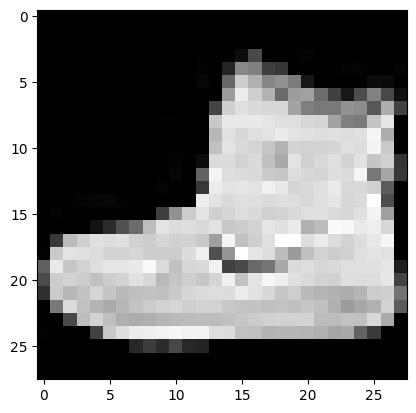

In [ ]:
plt.imshow(image.squeeze().cpu(),cmap="gray")

In [ ]:
# Passing the image to the model
model_2(image.unsqueeze(0))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.3 Stepping through `nn.Conv2d()`

See the `nn.Conv2d()` for extra: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html



Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Random image looks like: 


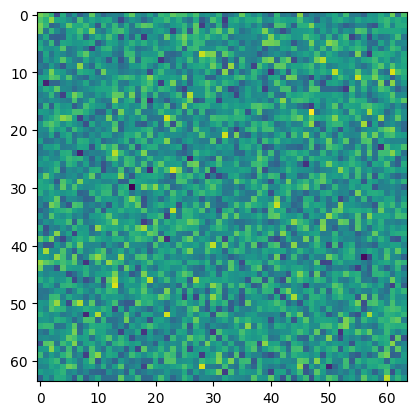

In [ ]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
#print(f"Test image: \n {test_image}")
print(f"Random image looks like: ")
plt.imshow(images[0][0])

In [ ]:
# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# Pass the data thrrough the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

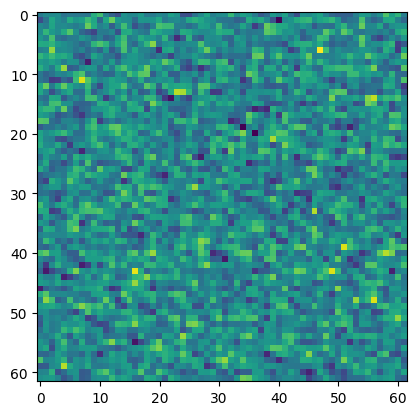

In [ ]:
plt.imshow(conv_output[0].detach().numpy())

### 7.4 Stepping through `nn.MaxPool2d()`

Go through the documentation: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueeze dimension: {test_image.unsqueeze(0).shape}")

# Creating a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just  the con_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass the data through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueeze dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])


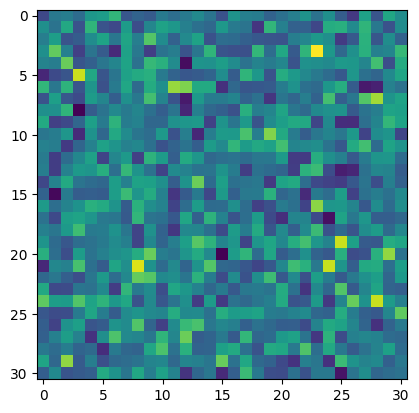

In [ ]:
plt.imshow(test_image_through_conv_and_max_pool[0].detach().numpy())

In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
random_tensor

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

<ipython-input-57-3834924003d5>:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3637.)
  plt.imshow(random_tensor[0].T)


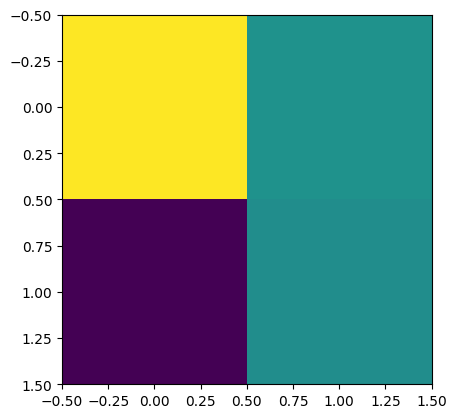

In [ ]:
plt.imshow(random_tensor[0].T)

In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max Pool tensor: {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Max Pool tensor: tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


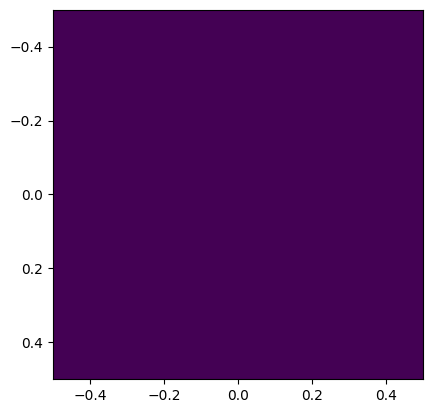

In [ ]:
plt.imshow(max_pool_tensor[0])

### 7.5 Setup a loss function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.6 Build a training loop and testing loop

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_start_time_in_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print((f"Epoch: {epoch}"))
  print("-----------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn= accuracy_fn,
             device = device)

  test_step(model=model_2,
            test_dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_end_time_in_gpu = timer()

total_time_on_model_2 = print_train_time(start=train_start_time_in_gpu,
                                         end=train_end_time_in_gpu,
                                         )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Train Loss: 0.59614, Train Acc: 78.29%
Testing loss: 0.28798, Testing acc: 87.500000%

Epoch: 1
-----------
Train Loss: 0.36106, Train Acc: 86.91%
Testing loss: 0.21197, Testing acc: 84.375000%

Epoch: 2
-----------
Train Loss: 0.32207, Train Acc: 88.41%
Testing loss: 0.16709, Testing acc: 96.875000%

Train time on None: 35.441 seconds


In [ ]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32273685932159424,
 'model_acc': 88.50838658146965}

## 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.322737,88.508387


In [ ]:
# Add training time to results comparision
compare_results['training_time'] = [total_train_time_model_0,
                                    total_time_on_model_1,
                                    total_time_on_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,28.656062
1,FashionMNISTModelV1,0.685001,75.019968,29.967740
2,FashionMNISTModelV2,0.322737,88.508387,35.440532


Text(0.5, 0, 'Model Name')

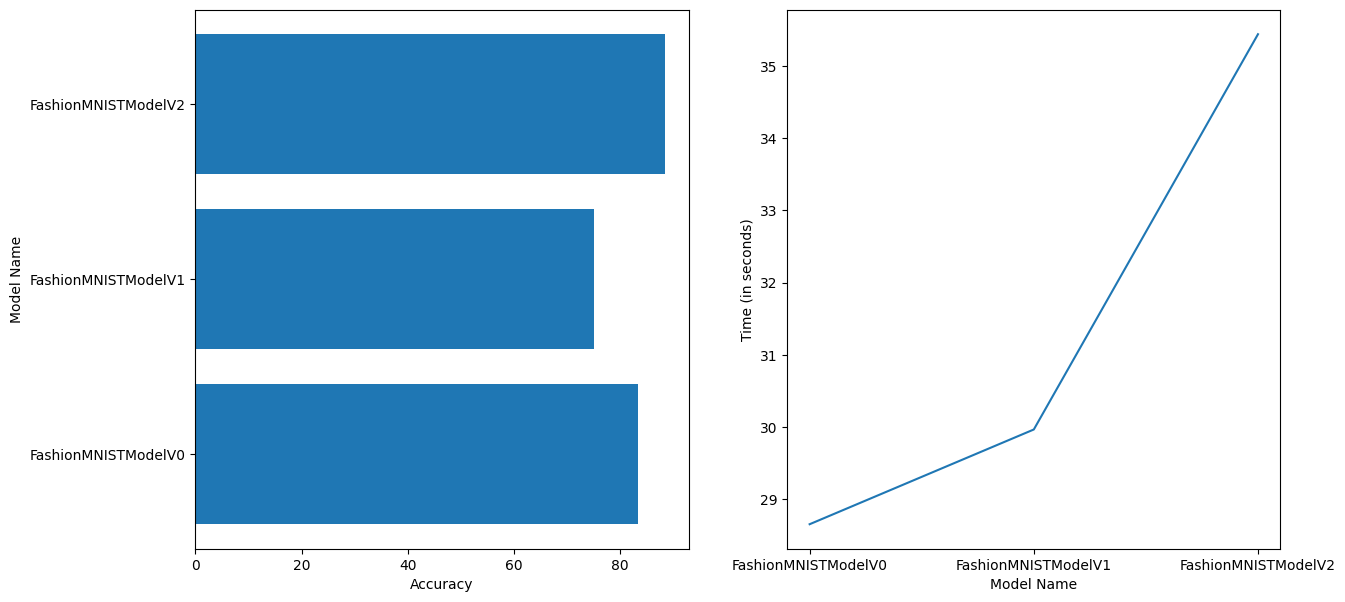

In [ ]:
# Visualize the model results

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.barh(compare_results["model_name"],width=compare_results['model_acc'])
plt.xlabel('Accuracy')
plt.ylabel('Model Name')
plt.subplot(1,2,2)
plt.plot(compare_results['model_name'],compare_results['training_time'])
plt.ylabel('Time (in seconds)')
plt.xlabel('Model Name')


## 9. Make and evaluate random prediction with best model

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample,dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get the prediction probability (logits -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)


In [ ]:
img,label = test_data[0][:10]
img.shape,label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []

for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

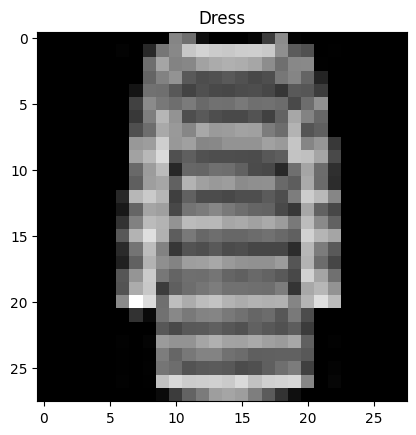

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
# Make Predictions
pred_probs_model_2 = make_predictions(model=model_2,
                              data=test_samples)

In [ ]:
pred_probs_model_2[:2]

tensor([[2.0236e-02, 2.6846e-03, 1.1224e-02, 8.8173e-01, 6.2881e-02, 8.2472e-05,
         2.0148e-02, 4.1257e-05, 9.4760e-04, 2.5681e-05],
        [2.3655e-06, 4.4354e-06, 1.4049e-05, 1.5683e-04, 1.0677e-05, 4.7949e-03,
         6.0475e-07, 9.9400e-01, 4.6449e-04, 5.5332e-04]])

In [ ]:
pred_classes = pred_probs_model_2.argmax(dim=1)
pred_classes

tensor([3, 7, 9, 1, 4, 8, 6, 1, 8])

In [ ]:
test_labels

[3, 7, 9, 1, 2, 8, 4, 1, 8]

### 9.2 Plotting the predicted classes

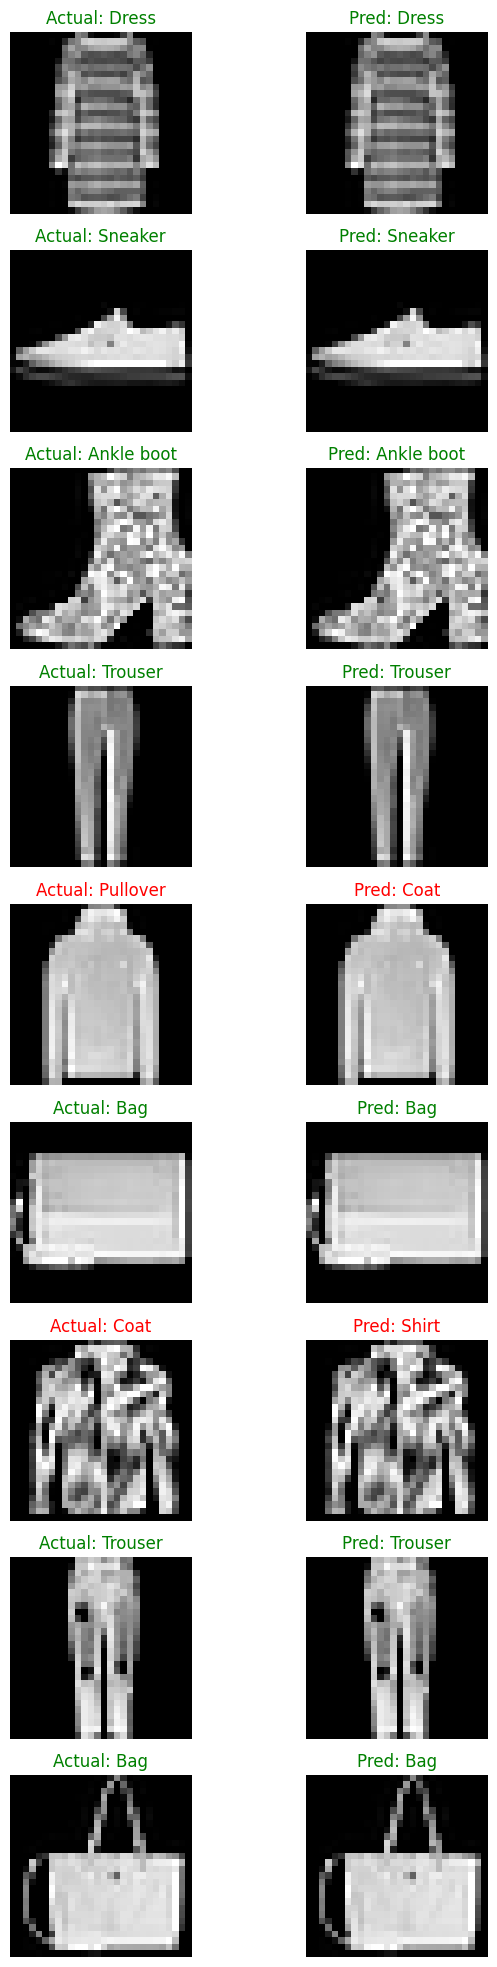

In [ ]:
torch.manual_seed(42)

fig = plt.figure(figsize=(7,25))
rows,cols=9,2

for i in range(1,rows*cols+1,2):
  actual_class = class_names[test_labels[(i+1)//2 -1]]
  pred_class = class_names[pred_classes[(i+1)//2 -1]]
  fig.add_subplot(rows,cols,i)
  plt.imshow(test_samples[(i+1)//2 -1].squeeze(),cmap='gray')
  if actual_class == pred_class:
    plt.title(f"Actual: {actual_class}",c='g')
  else:
    plt.title(f"Actual: {actual_class}",c='r')
  plt.axis(False)

  fig.add_subplot(rows,cols,i+1)
  plt.imshow(test_samples[(i+1)//2 -1].squeeze(),cmap='gray')
  if actual_class == pred_class:
    plt.title(f"Pred: {pred_class}",c='g')
  else:
    plt.title(f"Pred: {pred_class}",c='r')
  plt.axis(False)

In [ ]:
len(test_samples)

9

## 10. Making a confusion matrix for the further predictions

https://www.learnpytorch.io/03_pytorch_computer_vision/#10-making-a-confusion-matrix-for-further-prediction-evaluation

1. Make prediction with out trained model in the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` -- https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` -- https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [ ]:
from tqdm.auto import tqdm

#1. Make prediction from out trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making Predictions..."):
    # Send the data and targets to target device
    X,y = X.to(device),y.to(device)

    # Do the forward pass
    y_logits = model_2(X)

    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)

    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# See if requird packages are installed and if not install them

try:
  import torchmetrics,mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1])>= 19,"mlxtend version should be 0.19.1 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.0 MB/s eta 0:00:00
mlxtend version: 0.23.1


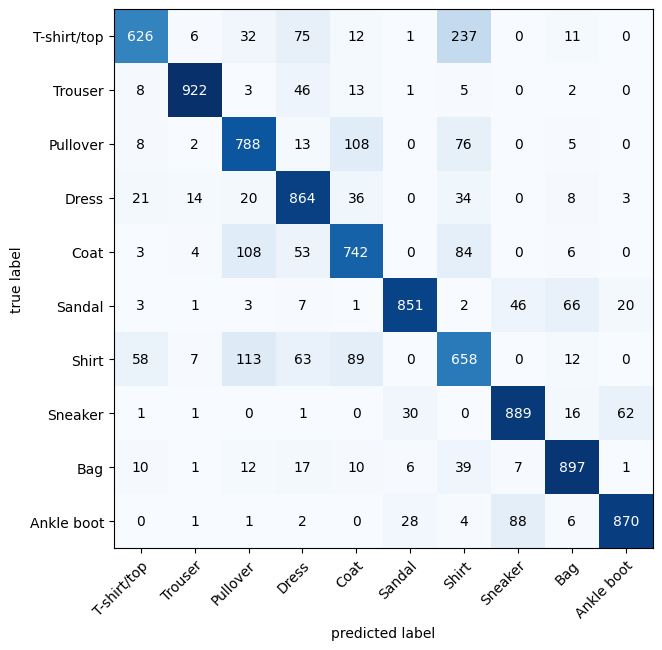

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#  2. Setup confusion instance and compare presictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target = test_data.targets)

# 3. Plot our confusion matric
fig,ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

In [ ]:
confmat_tensor

tensor([[626,   6,  32,  75,  12,   1, 237,   0,  11,   0],
        [  8, 922,   3,  46,  13,   1,   5,   0,   2,   0],
        [  8,   2, 788,  13, 108,   0,  76,   0,   5,   0],
        [ 21,  14,  20, 864,  36,   0,  34,   0,   8,   3],
        [  3,   4, 108,  53, 742,   0,  84,   0,   6,   0],
        [  3,   1,   3,   7,   1, 851,   2,  46,  66,  20],
        [ 58,   7, 113,  63,  89,   0, 658,   0,  12,   0],
        [  1,   1,   0,   1,   0,  30,   0, 889,  16,  62],
        [ 10,   1,  12,  17,  10,   6,  39,   7, 897,   1],
        [  0,   1,   1,   2,   0,  28,   4,  88,   6, 870]])

In [ ]:
## 11. Save and load best performing model

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "03.pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f = MODEL_SAVE_PATH)

Saving the model to: models/03.pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32273685932159424,
 'model_acc': 88.50838658146965}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32273685932159424,
 'model_acc': 88.50838658146965}

In [ ]:
# Check if model results are closed to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
             torch.tensor(loaded_model_2_results['model_loss']))

tensor(True)

## Exercise


In [ ]:
import torch
from torch import nn
import torchvision
from torchvision.datasets import MNIST
from pathlib import Path

device = "cuda" if torch.cuda.is_available() else "cpu"

### 1. Importing data

In [ ]:
train_data = MNIST(
    root='data',
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
    )

test_data = MNIST(
    root='data',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17688412.40it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 484285.14it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4423755.48it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4824139.98it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
classes = train_data.classes

In [ ]:
image = train_data.data[0]

(-0.5, 27.5, 27.5, -0.5)

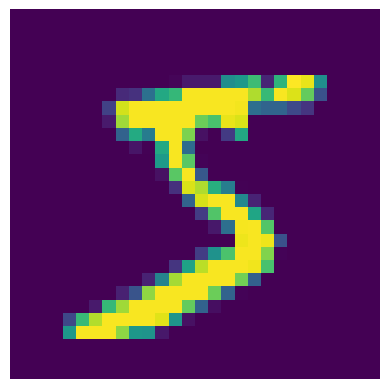

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis(False)

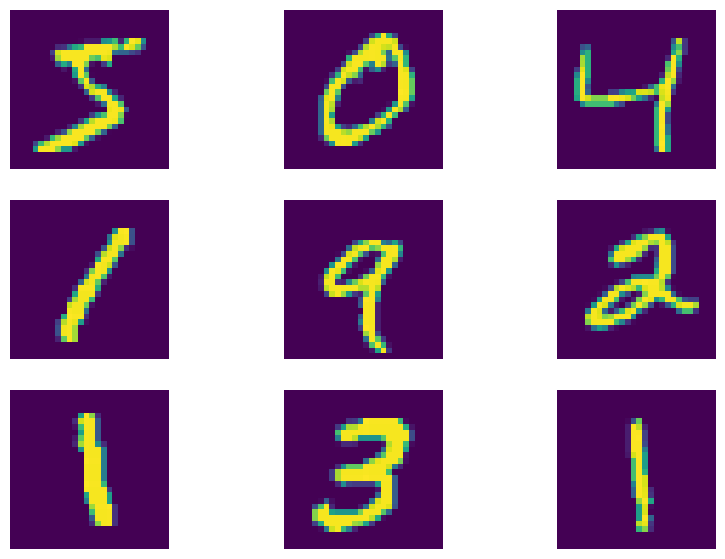

In [ ]:
images = train_data.data[:9]

plt.figure(figsize=(10,7))
row,col = 3,3

for i in range(len(images)):
  plt.subplot(3,3,i+1)
  plt.imshow(images[i])
  plt.axis(False)

### 2. Preparing Dataloader

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [ ]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch

(torch.Size([32, 1, 28, 28]),
 tensor([8, 5, 8, 3, 2, 1, 8, 0, 4, 9, 7, 0, 2, 3, 6, 9, 5, 1, 1, 2, 0, 3, 8, 7,
         1, 6, 0, 5, 0, 6, 5, 3]))

Random index: tensor([23])


Text(0.5, 1.0, 'tensor([7])')

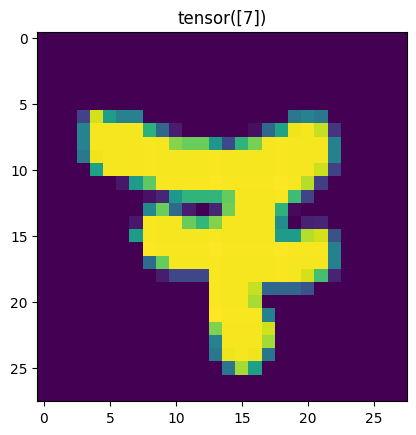

In [ ]:
rand_idx = torch.randint(0,len(train_labels_batch),size=[1])
print(f"Random index: {rand_idx}")

img,lbl = train_features_batch[rand_idx],train_labels_batch[rand_idx]

plt.imshow(img.squeeze())
plt.title(lbl)

### 3. Building a model

In [ ]:
class MNISTModelV0(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()

    self.conv_layer_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_layer_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  padding=1,
                  kernel_size=3,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_layer_1(x)
    x = self.conv_layer_2(x)
    x = self.classifier(x)
    return x

In [ ]:
MNISTModelV0

__main__.MNISTModelV0

In [ ]:
model_ex1 = MNISTModelV0(input_shape=1,
                         hidden_units=10,
                         output_shape=10).to(device)

In [ ]:
model_ex1

MNISTModelV0(
  (conv_layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
next(iter(model_ex1.parameters())).device

device(type='cuda', index=0)

In [ ]:
img_logits = model_ex1(img.to(device))
img_logits

tensor([[ 0.0513, -0.0343,  0.0440, -0.0833,  0.0587,  0.0181,  0.0127,  0.0208,
         -0.0487,  0.0346]], device='cuda:0', grad_fn=<AddmmBackward0>)

(-0.5, 27.5, 27.5, -0.5)

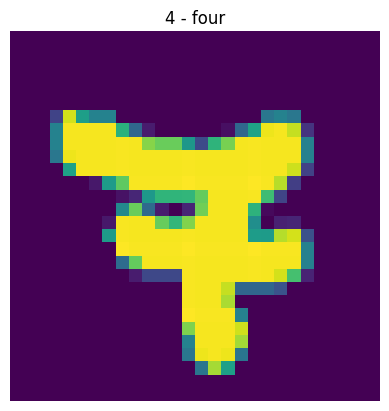

In [ ]:
img_pred = torch.argmax(img_logits)
cls = classes[img_pred]

plt.imshow(img.squeeze())
plt.title(cls)
plt.axis(False)

### 4. Setup loss function, optimizer and accuracy function

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_ex1.parameters(),
                            lr = 0.1)

def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = correct*100/len(y_true)
  return acc


### 4. Creating a train and test loop

In [ ]:
def train_loop(model:nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device: torch.device = device
               ):
  model.train()

  train_loss,train_acc = 0,0

  for batch, (X,y) in enumerate(data_loader):

    X,y = X.to(device),y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred,y)
    acc = accuracy_fn(y_true=y,
                      y_pred=y_pred.argmax(dim=1))

    train_loss+=loss
    train_acc+=acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss}, Train_acc: {train_acc}")

In [ ]:
def test_loop(model:nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn,
              accuracy_fn,
              device: torch.device = device):
  model.eval()

  test_loss,test_acc = 0,0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(data_loader):
      X,y = X.to(device),y.to(device)

      y_pred = model(X)

      loss = loss_fn(y_pred,y)
      acc = accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))

      test_loss += loss
      test_acc += acc

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Testing loss: {test_loss}, Testing acc: {test_acc}")





In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 3

for i in tqdm(range(epochs)):

  train_loop(model=model_ex1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn)

  test_loop(model=model_ex1,
            data_loader=test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn)



  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.25256583094596863, Train_acc: 91.74833333333333
Testing loss: 0.07304795831441879, Testing acc: 97.8035143769968
Train loss: 0.07253248244524002, Train_acc: 97.7
Testing loss: 0.04826817661523819, Testing acc: 98.50239616613419
Train loss: 0.056271787732839584, Train_acc: 98.255
Testing loss: 0.050362199544906616, Testing acc: 98.42252396166134


### 6. Testing the model with eval_model function

In [ ]:
def eval_model(model:nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               accuracy_fn: accuracy_fn,
               device: torch.device = device):

  model.eval()

  test_loss,test_acc = 0,0

  with torch.inference_mode():
    for batch, (X,y) in tqdm(enumerate(data_loader)):
      X,y = X.to(device),y.to(device)

      y_pred = model(X)

      loss = loss_fn(y_pred,y)
      acc = accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))

      test_loss += loss
      test_acc += acc

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  print(f"Evaluation loss: {test_loss:.5f}, Evaluation accuracy: {test_acc:.4f}")

  return {"Model": model.__class__.__name__,
          "Model Acc":test_acc,
          "Model loss": test_loss}

eval_model(model_ex1,
           test_dataloader,
           loss_fn,
           accuracy_fn)

0it [00:00, ?it/s]

Evaluation loss: 0.05036, Evaluation accuracy: 98.4225


{'Model': 'MNISTModelV0',
 'Model Acc': 98.42252396166134,
 'Model loss': tensor(0.0504, device='cuda:0')}

In [ ]:
i = 0
for batch, (X,y) in enumerate(train_dataloader):
  print(f"Shape of Batch is {batch}, Batch is: {batch}")
  print()
  print(f"Shape if X is {X.shape}, X is: {X}")
  print()
  print(f"Shape of y is {y.shape}, y is: {y}")
  print()

  i+=1

  if i == 1:
    break

### 7. Visualizing the predicted labels

In [ ]:
import random
test_samples,test_labels = [],[]

for sample,labels in random.sample(list(test_data),9):
  test_samples.append(sample)
  test_labels.append(labels)

test_samples[0].shape,test_labels

(torch.Size([1, 28, 28]), [2, 7, 5, 1, 5, 8, 1, 9, 7])

In [ ]:
pred_logit = model_ex1(test_samples[0].unsqueeze(dim=1).to(device))
pred_logit

tensor([[-2.9236,  9.6934, 19.3377,  4.1239, -9.3673, -8.8741, -3.9538, -1.4638,
          3.9617, -8.1037]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
pred = pred_logit.argmax(dim=1)
pred

tensor([2], device='cuda:0')

Text(0.5, 1.0, '2 - two')

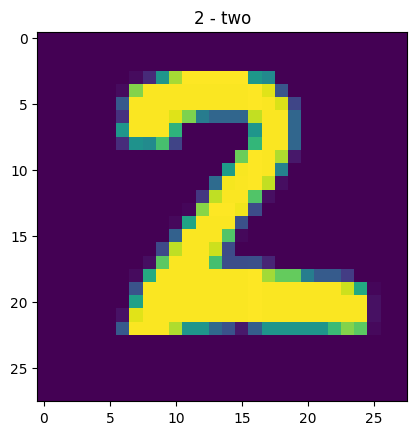

In [ ]:
plt.imshow(test_samples[0].squeeze())
plt.title(classes[pred])

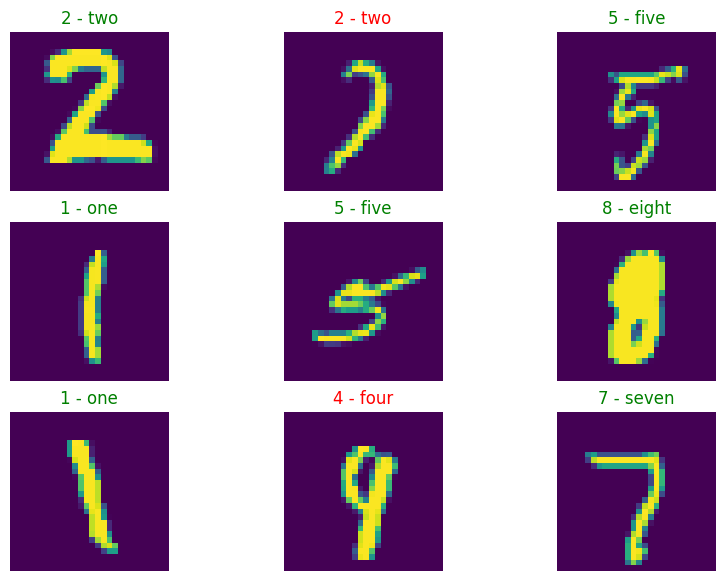

In [ ]:


row,col = 3,3

fig = plt.figure(figsize=(10,7))

for i in range(1,row*col+1):
  fig.add_subplot(row,col,i)
  plt.imshow(test_samples[i-1].squeeze())
  pred_logits = model_ex1(test_samples[i-1].unsqueeze(dim=1).to(device))
  pred = pred_logits.argmax(dim=1)

  if test_labels[i-1] == pred:
    plt.title(classes[pred],c='g')
  else:
    plt.title(classes[pred],c='r')
  plt.axis(False)

### 7. Plotting Confusion Matrix

In [ ]:
model_ex1.eval()

y_preds = []
with torch.inference_mode():
  for batch, (X,y) in tqdm(enumerate(test_dataloader)):
    X,y = X.to(device),y.to(device)

    y_logits = model_ex1(X)

    y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)

    y_preds.append(y_pred)

y_pred_tensor = torch.cat(y_preds)
y_pred[:10]

0it [00:00, ?it/s]

tensor([1, 1, 3, 4, 5, 6, 7, 8, 9, 0], device='cuda:0')

In [ ]:
!pip install torchmetrics

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

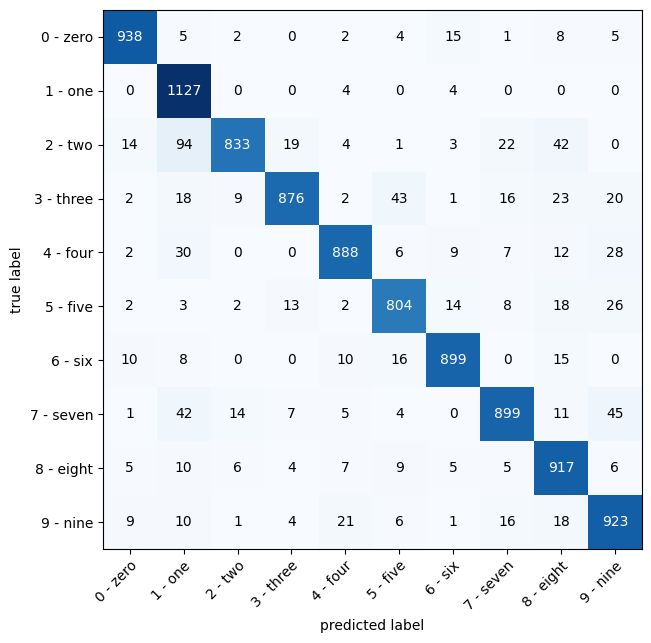

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task='multiclass',num_classes=10)
confusion_matrix = confmat(y_pred_tensor.cpu(),test_data.targets.cpu())

plot_confusion_matrix(conf_mat=confusion_matrix.numpy(),
                      class_names=classes,
                      figsize=(10,7))

In [ ]:
y_pred_tensor.shape

torch.Size([10000])

In [ ]:
y.shape

torch.Size([16])